In [3]:

from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
from tkinter.filedialog import askopenfilename
import pandas as pd 
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


main = tkinter.Tk()
main.title("Classification of Lung Cancer Nodules to Monitor Patients Health using Neural Network topology with SVM algorithm & Compare with K-Means Accuracy")
main.geometry("1300x1200")

global filename
global classifier
global svm_acc, kmeans_acc
global X, Y
global X_train, X_test, y_train, y_test
global pca

def uploadDataset():
    global filename
    filename = filedialog.askdirectory(initialdir=".")
    text.delete('1.0', END)
    text.insert(END,filename+" loaded\n");
    
    
def splitDataset():
    global X, Y
    global X_train, X_test, y_train, y_test
    global pca
    text.delete('1.0', END)
    X = np.load('features/X.txt.npy')
    Y = np.load('features/Y.txt.npy')
    X = np.reshape(X, (X.shape[0],(X.shape[1]*X.shape[2]*X.shape[3])))

    pca = PCA(n_components = 100)
    X = pca.fit_transform(X)
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    text.insert(END,"Total CT Scan Images Found in dataset : "+str(len(X))+"\n")
    text.insert(END,"Train split dataset to 80% : "+str(len(X_train))+"\n")
    text.insert(END,"Test split dataset to 20%  : "+str(len(X_test))+"\n")


def executeSVM():
    global classifier
    global svm_acc
    text.delete('1.0', END)
    cls = svm.SVC() 
    cls.fit(X_train, y_train)
    predict = cls.predict(X_test)
    svm_acc = accuracy_score(y_test,predict)*100
    classifier = cls
    text.insert(END,"SVM Accuracy : "+str(svm_acc)+"\n")

def executeKmeans():
    global kmeans_acc
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(X_train)
    predict = kmeans.predict(X_test)
    kmeans_acc = accuracy_score(y_test,predict)*100
    print("KMeans Predicted Labels : "+str(kmeans.labels_))
    centroids = kmeans.cluster_centers_
    text.insert(END,"K-Means Accuracy : "+str(kmeans_acc)+"\n")
    

def predictCancer():
    filename = filedialog.askopenfilename(initialdir="testSamples")
    img = cv2.imread(filename)
    img = cv2.resize(img, (64,64))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(64,64,3)
    im2arr = im2arr.astype('float32')
    im2arr = im2arr/255
    test = []
    test.append(im2arr)
    test = np.asarray(test)
    test = np.reshape(test, (test.shape[0],(test.shape[1]*test.shape[2]*test.shape[3])))
    test = pca.transform(test)
    predict = classifier.predict(test)[0]
    msg = ''
    if predict == 0:
        msg = "Uploaded CT Scan is Normal"
    if predict == 1:
        msg = "Uploaded CT Scan is Abnormal"
    img = cv2.imread(filename)
    img = cv2.resize(img, (400,400))
    cv2.putText(img, msg, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 255), 2)
    cv2.imshow(msg, img)
    cv2.waitKey(0)    

def graph():
    height = [svm_acc, kmeans_acc]
    bars = ('SVM Accuracy','KMeans Accuracy')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()

font = ('times', 14, 'bold')
title = Label(main, text='''Classification of Lung Cancer Nodules to Monitor Patients Health using Neural Network topology with 
SVM algorithm & Compare with K-Means Accuracy''')
title.config(bg='deep sky blue', fg='black')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=50,y=120)
text.config(font=font1)


font1 = ('times', 13, 'bold')
uploadButton = Button(main, text="Upload Lung Cancer Dataset", command=uploadDataset)
uploadButton.place(x=50,y=550)
uploadButton.config(font=font1)  

readButton = Button(main, text="Read & Split Dataset to Train & Test", command=splitDataset)
readButton.place(x=350,y=550)
readButton.config(font=font1) 

svmButton = Button(main, text="Execute SVM Algorithms", command=executeSVM)
svmButton.place(x=50,y=600)
svmButton.config(font=font1) 

kmeansButton = Button(main, text="Execute K-Means Algorithm", command=executeKmeans)
kmeansButton.place(x=350,y=600)
kmeansButton.config(font=font1) 

predictButton = Button(main, text="Predict Lung Cancer", command=predictCancer)
predictButton.place(x=50,y=650)
predictButton.config(font=font1)

graphButton = Button(main, text="Accuracy Graph", command=graph)
graphButton.place(x=350,y=650)
graphButton.config(font=font1) 

main.config(bg='LightSteelBlue3')
main.mainloop()


In [3]:
# import keras

C:\Users\Sree Vardhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sree Vardhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sree Vardhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sree Vardhan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

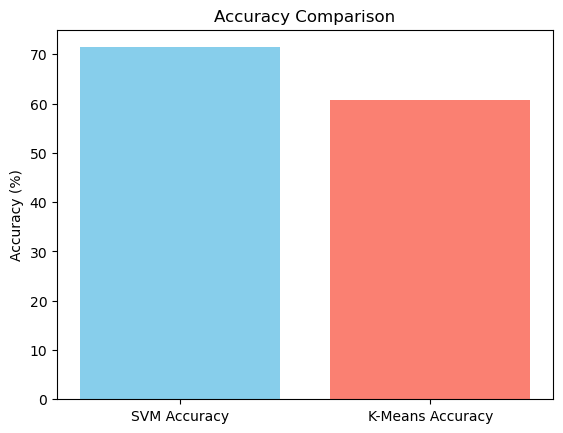

In [ ]:
from tkinter import messagebox, simpledialog, filedialog, Text, Label, Scrollbar, Button
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Main Window Configuration
main = tk.Tk()
main.title("Lung Cancer Nodule Classification & Monitoring")
main.geometry("800x700")
main.configure(bg='#f0f8ff')  # Light blue background for a modern look

# Global Variables
global filename, classifier, svm_acc, kmeans_acc, X, Y, X_train, X_test, y_train, y_test, pca

def uploadDataset():
    global filename
    filename = filedialog.askdirectory(initialdir=".")
    output_text.delete('1.0', tk.END)
    output_text.insert(tk.END, f"Dataset loaded from: {filename}\n")

def splitDataset():
    global X, Y, X_train, X_test, y_train, y_test, pca
    output_text.delete('1.0', tk.END)
    X = np.load('features/X.txt.npy')
    Y = np.load('features/Y.txt.npy')
    X = np.reshape(X, (X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))

    pca = PCA(n_components=100)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    output_text.insert(tk.END, f"Dataset loaded: {len(X)} images\n")
    output_text.insert(tk.END, f"Training Data: {len(X_train)} images\n")
    output_text.insert(tk.END, f"Test Data: {len(X_test)} images\n")

def executeSVM():
    global classifier, svm_acc
    output_text.delete('1.0', tk.END)
    cls = svm.SVC()
    cls.fit(X_train, y_train)
    predict = cls.predict(X_test)
    svm_acc = accuracy_score(y_test, predict) * 100
    classifier = cls
    output_text.insert(tk.END, f"SVM Accuracy: {svm_acc}%\n")

def executeKmeans():
    global kmeans_acc
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(X_train)
    predict = kmeans.predict(X_test)
    kmeans_acc = accuracy_score(y_test, predict) * 100
    output_text.insert(tk.END, f"K-Means Accuracy: {kmeans_acc}%\n")

def predictCancer():
    filename = filedialog.askopenfilename(initialdir="testSamples")
    img = cv2.imread(filename)
    img = cv2.resize(img, (64, 64))
    im2arr = img.reshape(1, -1).astype('float32') / 255
    test = pca.transform(im2arr)
    prediction = classifier.predict(test)[0]
    msg = "Normal" if prediction == 0 else "Abnormal"
    display_image(img, msg)

def display_image(img, msg):
    img = cv2.resize(img, (400, 400))
    cv2.putText(img, msg, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
    cv2.imshow(f"Prediction: {msg}", img)
    cv2.waitKey(0)
    
def graph():
    plt.bar(['SVM Accuracy', 'K-Means Accuracy'], [svm_acc, kmeans_acc], color=['skyblue', 'salmon'])
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Comparison")
    plt.show()

# Interface Design
font_title = ('Arial', 16, 'bold')
font_buttons = ('Arial', 12, 'bold')
font_output = ('Arial', 10)

# Title Label
title_label = Label(main, text='''Classification of Lung Cancer Nodules to Monitor Patients Health using Neural Network topology with 
Support Vector Machine algorithm & Compare with K-Means Accuracy''', font=font_title, bg='#4682B4', fg='black')
title_label.pack(fill=tk.X, pady=10)

# Output Text Area
output_text = Text(main, height=15, width=80, wrap='word', font=font_output)
output_text.pack(pady=10)
scroll = Scrollbar(output_text)
output_text.configure(yscrollcommand=scroll.set)

# Button Creation with Improved Layout and Padding
button_frame = tk.Frame(main, bg='#f0f8ff')
button_frame.pack(pady=10)

buttons = [
    ("Upload Dataset", uploadDataset),
    ("Split Dataset", splitDataset),
    ("Run SVM", executeSVM),
    ("Run K-Means", executeKmeans),
    ("Predict Cancer", predictCancer),
    ("Show Accuracy Graph", graph),
]

for i, (text, command) in enumerate(buttons):
    btn = Button(button_frame, text=text, command=command, font=font_buttons, bg='#4682B4', fg='black', width=20)
    btn.grid(row=i // 2, column=i % 2, padx=10, pady=5)

# Run Main Application Loop
main.mainloop()
